# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [20]:
#Set configurations
base_url= "http://api.openweathermap.org/data/2.5/weather?"
units= "imperial"
query_url = f"{base_url}units={units}&appid={api_key}&q="

#Create variables to hold weather data
city_list= []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        city_list.append(response["name"])
    except:
        pass


In [21]:
#Create lists to hold city data
lat= []
max_temp= []
humidity= []
cloudiness= []
wind_speed= []
country= []
date= []
lng= []

#Loop through cities and collect data
for x in city_list:
    response= requests.get(query_url + x).json()
    lat.append(response['coord']['lat'])
    max_temp.append(response['main']['temp_max'])
    humidity.append(response["main"]["humidity"])
    cloudiness.append(response["clouds"]["all"])
    wind_speed.append(response["wind"]["speed"])
    country.append(response["sys"]["country"])
    date.append(response["dt"])
    lng.append(response["coord"]["lon"])
max_temp    

[64.4,
 50.56,
 39.2,
 74.42,
 53.6,
 53.01,
 52.28,
 44.28,
 32.48,
 59.84,
 74.24,
 58.03,
 55.4,
 54.8,
 63.7,
 80.04,
 75.86,
 49.44,
 54,
 52.11,
 38.96,
 59,
 48.99,
 86,
 82.62,
 44.6,
 88.28,
 53.51,
 56.78,
 92.6,
 72.44,
 76.22,
 60.8,
 68.16,
 71.6,
 48.2,
 80.72,
 41,
 87.38,
 74.42,
 75.2,
 78.02,
 44.28,
 50.85,
 81.61,
 75.78,
 79.61,
 89.6,
 53.54,
 41.66,
 73.8,
 79.18,
 71.72,
 78.8,
 51.56,
 48.56,
 71.9,
 60.33,
 53.6,
 54.26,
 64.4,
 64.29,
 57.6,
 80.36,
 78.92,
 69.48,
 68,
 90.26,
 47.06,
 55.24,
 76.39,
 59.66,
 57.2,
 86.3,
 71.36,
 51.2,
 41,
 70.28,
 78.31,
 70.1,
 61.1,
 69.01,
 70.46,
 57.2,
 85.23,
 82.99,
 54.48,
 50.85,
 72.23,
 60.8,
 63.79,
 80.54,
 73.4,
 44,
 45.8,
 68.22,
 66.99,
 70,
 90.08,
 80.72,
 48.27,
 69.67,
 60.74,
 78.39,
 73.4,
 84.32,
 48.99,
 47.24,
 55.4,
 72.82,
 51.56,
 46.62,
 60.74,
 83.06,
 61.18,
 44.6,
 42.2,
 42.92,
 52.1,
 87.8,
 70.82,
 81.26,
 66.14,
 72.62,
 52,
 71.54,
 80.29,
 48.2,
 77.29,
 48,
 50,
 57.09,
 77,
 45.26,

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [24]:
response

{'coord': {'lon': 127.47, 'lat': 63.92},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 90.08,
  'pressure': 1005.92,
  'humidity': 31,
  'temp_min': 90.08,
  'temp_max': 90.08,
  'sea_level': 1005.92,
  'grnd_level': 998.54},
 'wind': {'speed': 2.26, 'deg': 283.72},
 'clouds': {'all': 33},
 'dt': 1562990197,
 'sys': {'message': 0.0064,
  'country': 'RU',
  'sunrise': 1562953162,
  'sunset': 1563024705},
 'timezone': 32400,
 'id': 2017215,
 'name': 'Sangar',
 'cod': 200}

In [23]:
weatherpy_df= pd.DataFrame({"City": city_list,
                          "Cloudiness": cloudiness,
                          "Country": country,
                          "Date": date,
                          "Humidity": humidity,
                          "Lat": lat,
                          "Lng": lng,
                          "Max Temp": max_temp,
                          "Wind Speed": wind_speed})
weatherpy_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Geraldton,40,CA,1562990070,77,49.72,-86.95,64.40,5.82
1,Griffith,75,AU,1562990070,66,-34.29,146.06,51.80,21.92
2,Ushuaia,40,AR,1562990071,80,-54.81,-68.31,39.20,6.93
3,Rikitea,62,PF,1562989816,78,-23.12,-134.97,74.42,14.14
4,Talcahuano,90,CL,1562989792,93,-36.72,-73.12,53.60,11.41


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

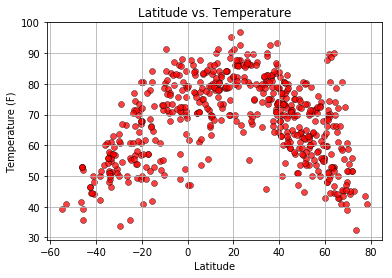

In [41]:
plt.scatter(lat, max_temp, marker="o", facecolor= "red", edgecolor= "black", linewidths= .5, alpha= .75)
plt.grid()
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.show
plt.savefig("../Images/weatherpy_temp.png")

#### Latitude vs. Humidity Plot

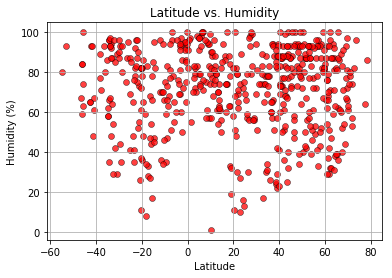

In [42]:
plt.scatter(lat, humidity, marker="o", facecolor= "red", edgecolor= "black", linewidths= .5, alpha= .75)
plt.grid()
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show
plt.savefig("../Images/weatherpy_humidity.png")

#### Latitude vs. Cloudiness Plot

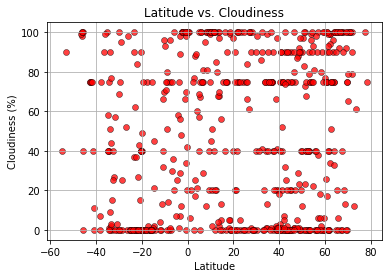

In [43]:
plt.scatter(lat, cloudiness, marker="o", facecolor= "red", edgecolor= "black", linewidths= .5, alpha= .75)
plt.grid()
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show
plt.savefig("../Images/weatherpy_cloudiness.png")

#### Latitude vs. Wind Speed Plot

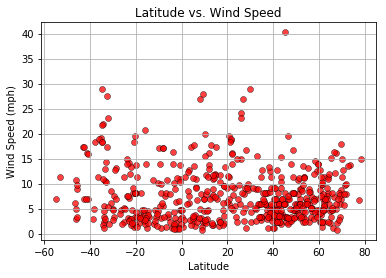

In [44]:
plt.scatter(lat, wind_speed, marker="o", facecolor= "red", edgecolor= "black", linewidths= .5, alpha= .75)
plt.grid()
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show
plt.savefig("../Images/weatherpy_wind.png")

Three observable trends:

1) From the latitude vs. temperature plot, it appears temperatures actually peak around 20 degrees north latitude. This could be because of the tilt of the Earth on its axis. A little research confirms that the Earth is tilted 23.5 degrees. This creates the tropic of cancer in the north and the tropic of capricorn in the south. Temperatures near the equator are slightly lower than the tropics because of increased cloud cover and precipitation near the equator. However,...

2)...the increase in cloud coverage is not reflected in the latitude vs cloudiness plot. There are cities with high cloud coverage in all latitudes. Cloudiness does not seem to cluster around the equator but many cities at all latitudes report cloudiness at the same percentiles of 0, 20, 40, 78, 90, and 100%. This seems inaccurate to me and I'm not sure if it is a characteristic of the data from the Open Weather Map API or my data collection methods.

3) High humidity appears to be a fact of nature near the equator. There is only one city between 20 degrees north and the equator that has less than 50% humidity. This city reports 0% humidity so it's possible that the zero was entered as "no data available" and not as the actual average humidity.